# Проект в рамках курса Open Datascience

Автор: Ким Антон

### Проект создавал исключительно в образовательных целях (практиковался). Все ресурсы и тему предоставил курс 

В ходе проекта решается задача прогнозирования положительного отклика (срочный вклад) на прямые звонки из банка.  
По-сути, задача является задачей банковского скоринга, т.е. по характеристикам клиента (потенциального клиента), предсказывается его поведение (невозврат кредита, желание открыть вклад и т.д.).

Источник идеи https://habr.com/ru/company/ods/blog/344044/
Источник данных UCI: https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Признаки

1) **age** - возраст потенциального клиента в годах  
2) **job** - профессия (Возможны следующие значения: *admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown*)  
3) **marital** - семейное положение (Значения: *divorced, married, single, unknown*)  
4) **education** - образование (Значения: *basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown*)  
5) **default** - есть ли дефолт по кредиту (Значения: *no, yes, unknown*)  
6) **housing** - есть ли кредит на жильё (Значения: *no, yes, unknown*)  
7) **loan** - есть ли потребительский кредит (Значения: *no, yes, unknown*)  
8) **contact** - способ связи c потенциальным клиентом (Значения: *cellular, telephone*)  
9) **month** - номер месяца, когда был крайний контакт с клиентом (Значения: *jan, feb, mar, ... , nov, dec*)  
10) **day_of_week** - день недели, когда был крайний контакт с клиентом (Значения: *mon, tue, wed, thu, fri*)  
11) **duration** - продолжительность крайнего звонка клиенту (Имеется ввиду, звонок, результат которого мы прогнозируем, в секундах)  
12) **campaign** - количество контактов с данным клиентом в течение текущей компании  
13) **pdays** - количество дней, прошедшее с предыдущего контакта (999 для новых клиентов)  
14) **previous** - количество контактов с данным клиенто до текущей компании  
15) **poutcome** - результат предыдущей маркетинговой компании (Значения: *failure, nonexistent, success*)  
16) **emp.var.rate** - коэффициент изменения занятости - квартальный показатель  
17) **cons.price.idx** - индекс потребительских цен - месячный показатель  
18) **cons.conf.idx** - индекс доверия потребителей - ежемесячный показатель  
19) **euribor3m** - euribor 3-месячный курс - дневной индикатор  
20) **nr.employed** - количество сотрудников - квартальный показатель  

Целевой признак:

21) **target** - подписал ли клиент срочный вклад (Значения: *yes, no*)

# Основные библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
import time
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

## Первичный анализ

In [3]:
raw_data = pd.read_csv('data/bank-additional-full.csv', header = 0, sep = ';')
data = raw_data.copy()
pd.set_option('display.max_columns', 100)

In [4]:
data.shape

(41188, 21)

In [5]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data.isnull().sum().any() # данные цельны

False

## Числовые признаки

In [7]:
data.describe(include = ['int64', 'float64'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### распределения числовых признаков. 

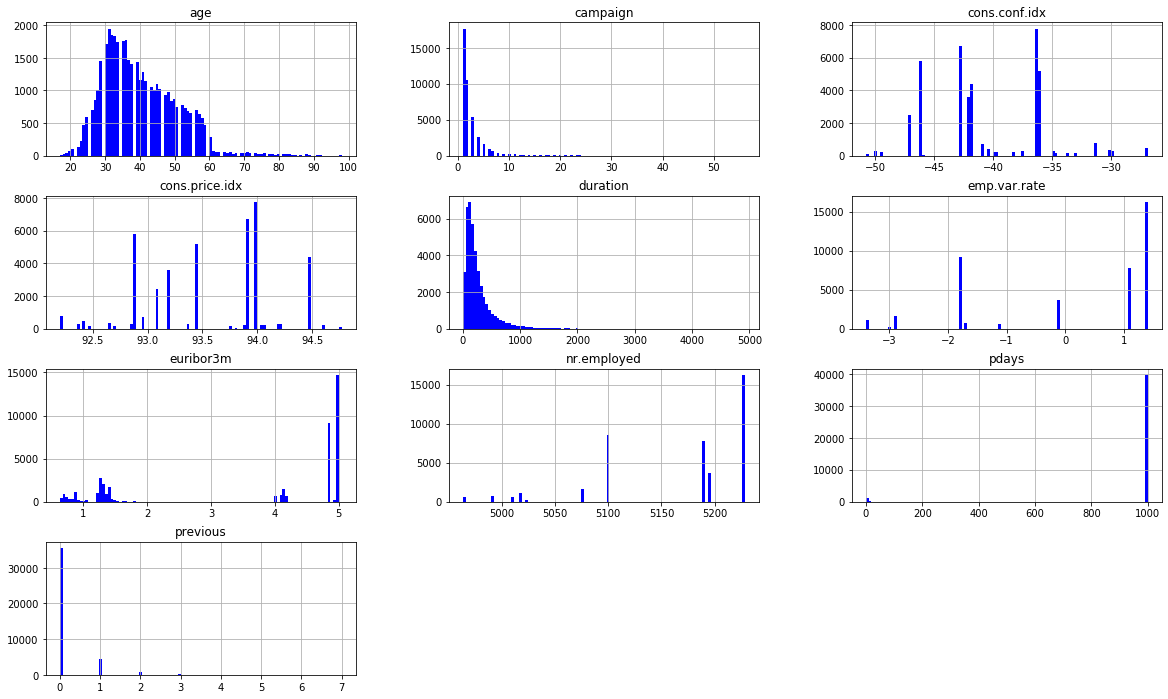

In [8]:
categorial = data.select_dtypes('object').columns
numerical = data.select_dtypes(['float64', 'int64']).columns

data[numerical].hist(figsize=(20,12), bins=100, color='blue');

### много признаков с "пиками"

# Категориальные признаки

In [9]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


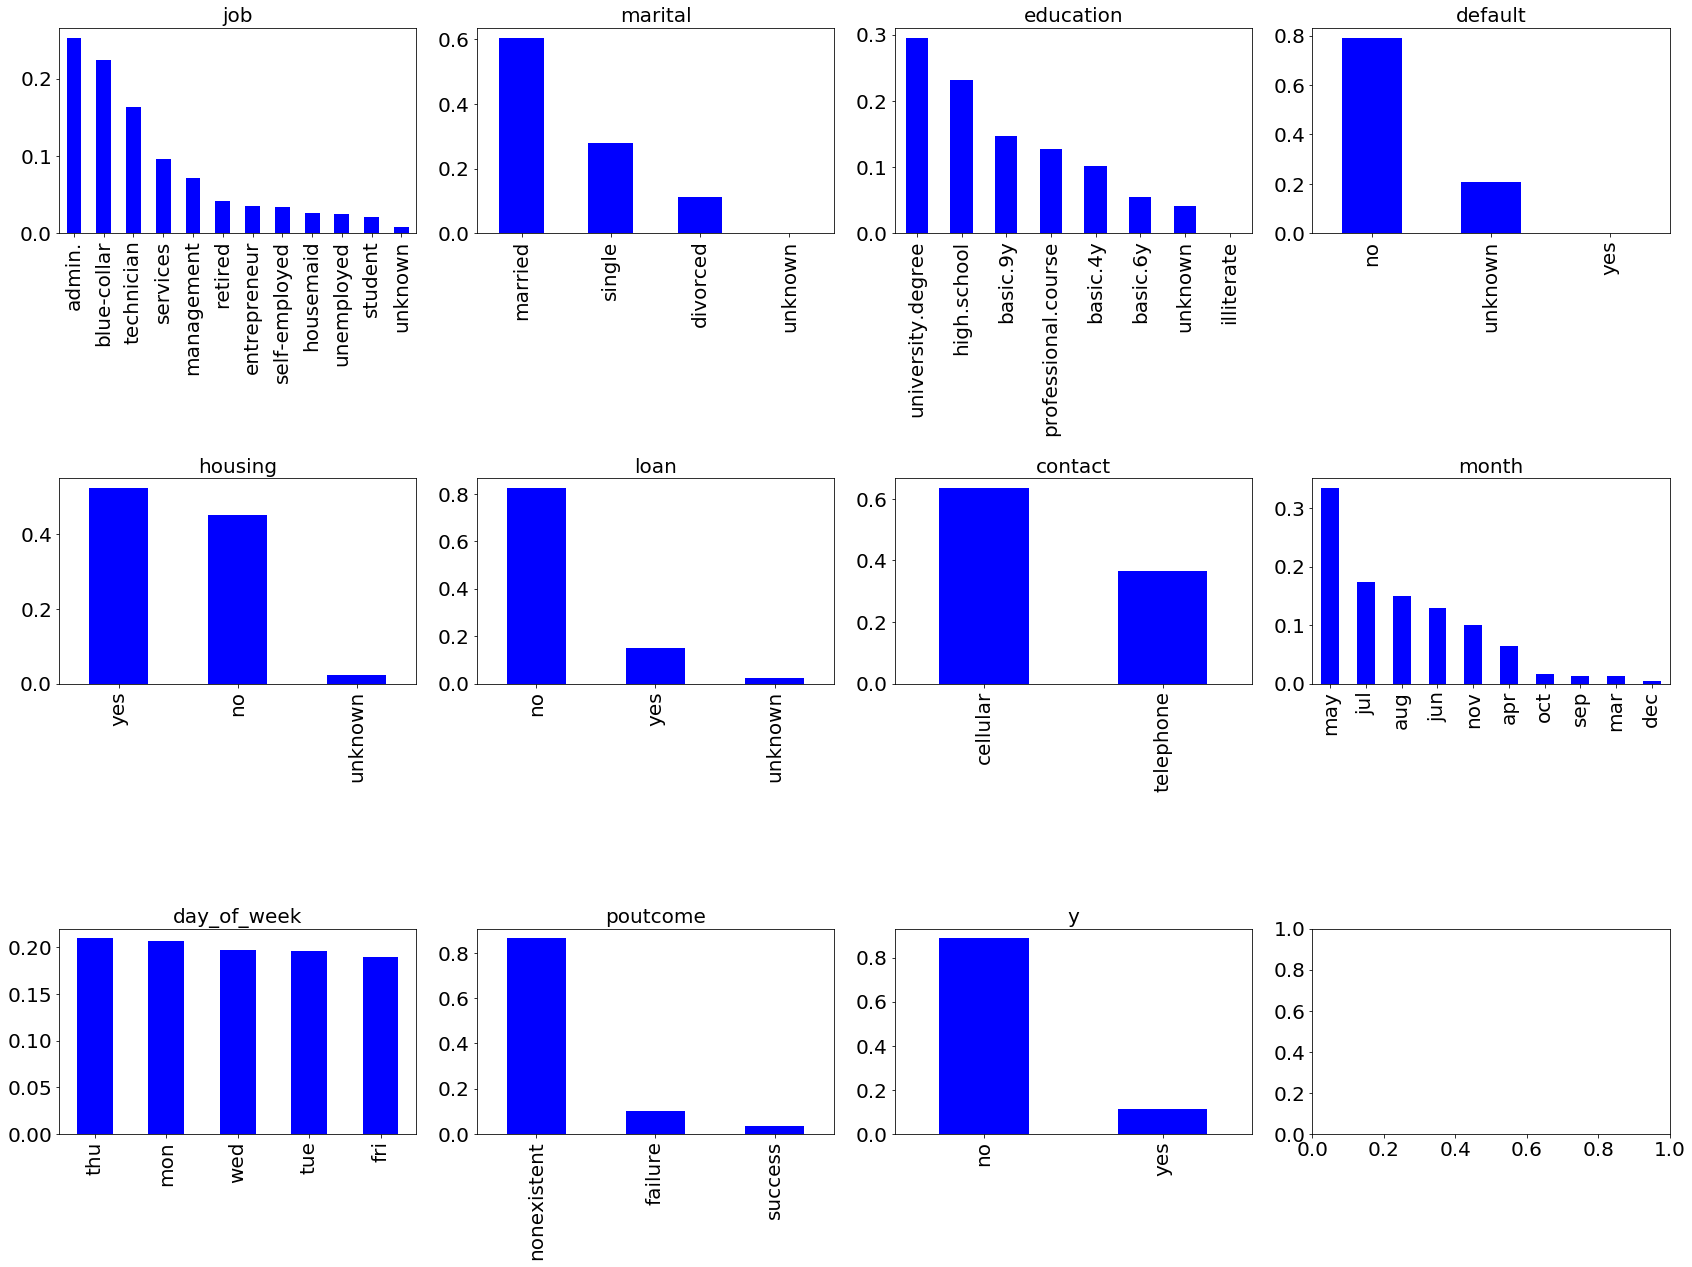

In [10]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorial)):
    data[categorial[i]].value_counts(normalize=True).plot(kind='bar', label=categorial[i], ax=axes[i//4, i%4], color='blue')
    axes[i//4, i%4].set_title(categorial[i])
plt.tight_layout()

Как видим, для многих признаков, какая-то из групп привалирует, например, в датасете более половины клиентов женаты/замужем.

Посмотрим на матрицу корреляции (для числовых признаков):

In [11]:
correlation_table = data.corr()
correlation_table

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Визуализируем матрицу корреляции:

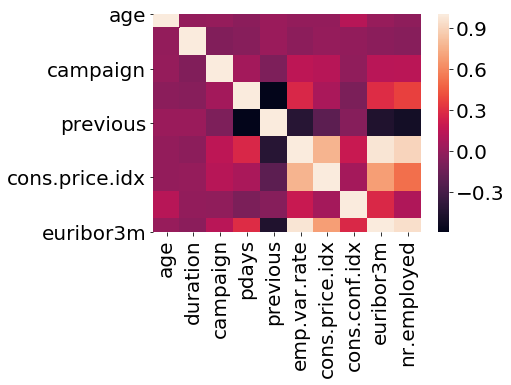

In [12]:
sns.heatmap(correlation_table)

Признаки **euribor3m и nr.employed сильно коррелируют с emp.var.rate**, значит удаляем

Целевой признак показывает положительный ли результат телефонного звонка в ходе маркетинговой компании.  
Обозначим положительный исход как 1, отрицательный как 0:

In [13]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

### Посмотрим на них с другой стороны

In [14]:
categorial.remove('y')
data[categorial] = data[categorial].apply(LabelEncoder().fit_transform)

Визуализируем **долю положительных откликов** по группам:

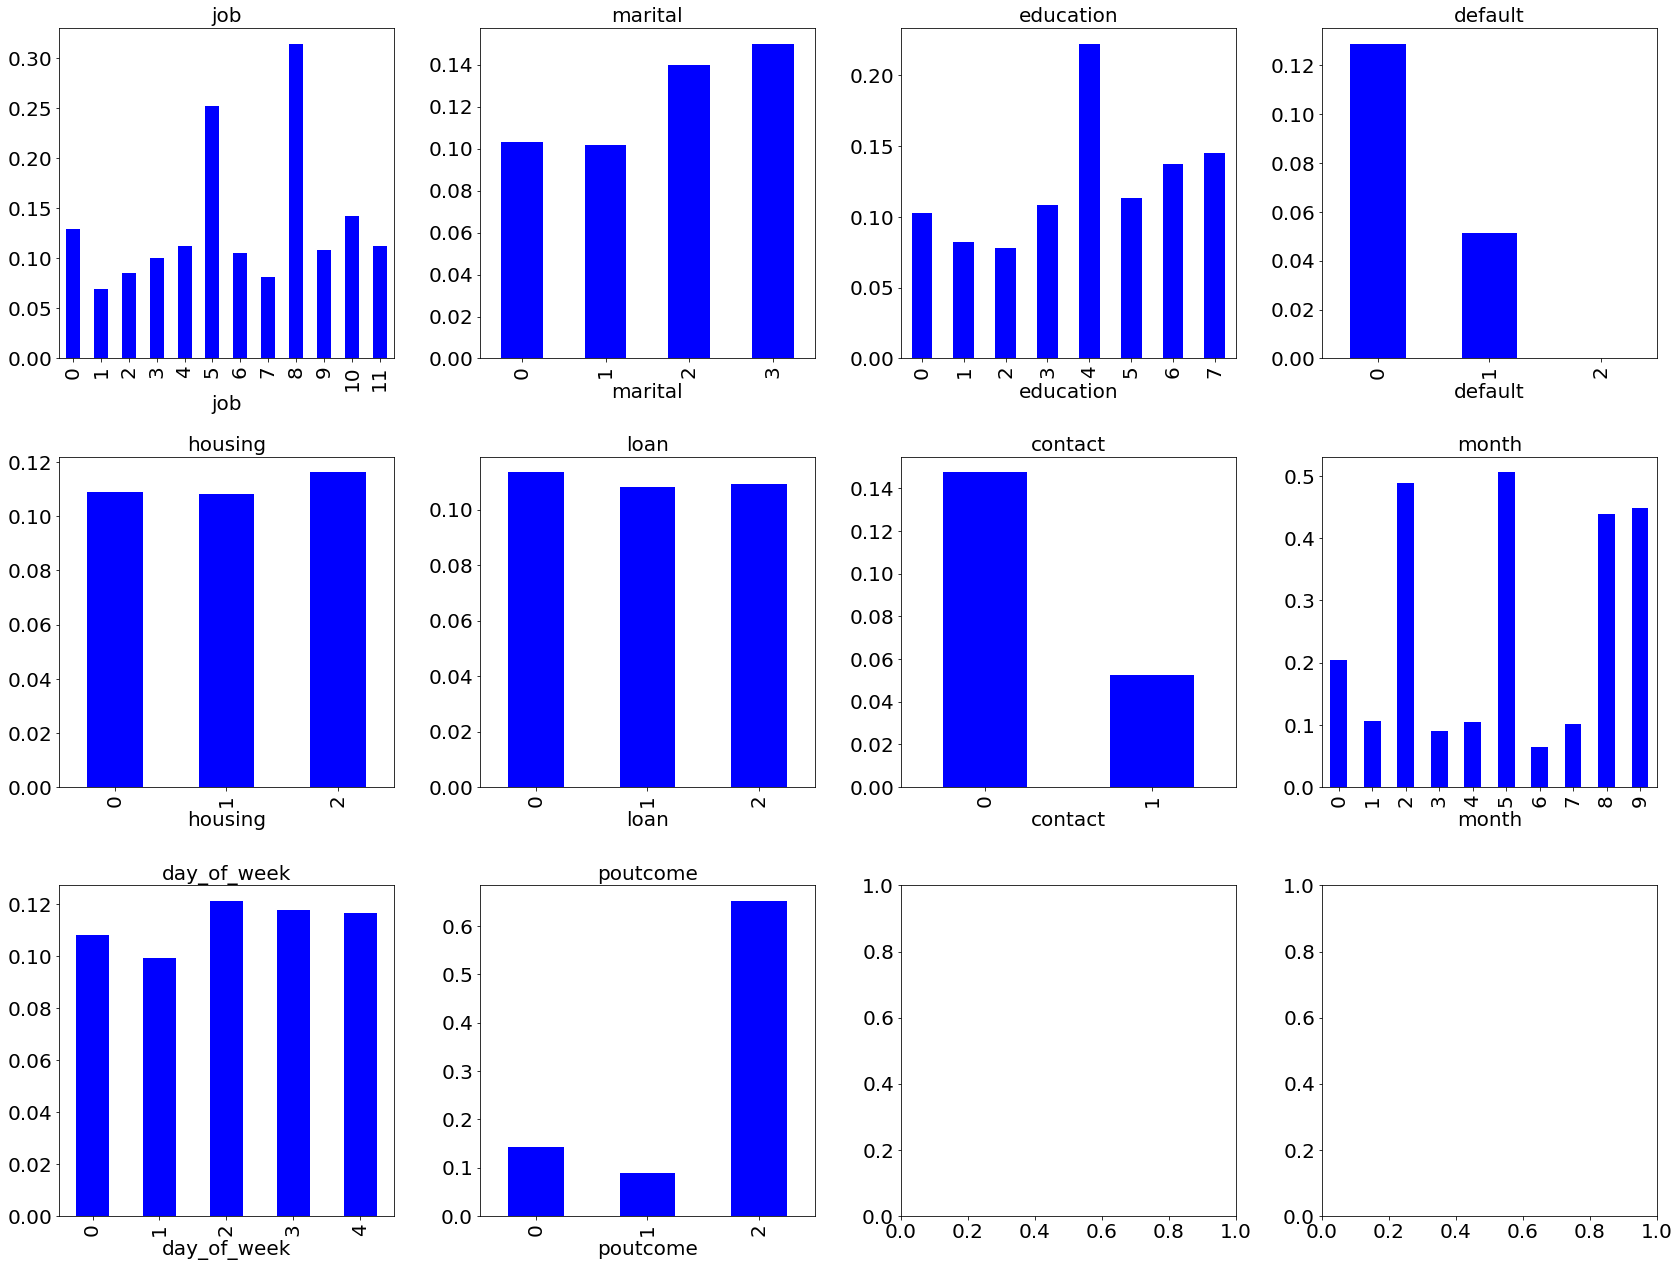

In [15]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorial)):
    data.groupby(categorial[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='blue')
    axes[i//4, i%4].set_title(categorial[i])

plt.tight_layout()

В таком виде, графики уже более интересные. Сразу видно что housing, day of week, loan практически бесполезны.

## Предобработка данных

Удаляю все неправильные или безполезные признаки признаки

In [16]:
data.drop(['euribor3m', 'nr.employed'], axis=1, inplace=True)
data.drop(['duration'], axis=1, inplace=True)

### функции для расчета значимости признака

In [17]:
def Information_Value(x, y):
    df = pd.DataFrame({'x': x, 'y': y})
    good = df.groupby('x')['y'].sum() / np.sum(df['y'])
    bad = (df.groupby('x')['y'].count() - df.groupby('x')['y'].sum()) / (len(df['y']) - np.sum(df['y']))
    WOE = np.log((good+0.000001) / bad)
    IV = (good - bad)*WOE
    return IV.sum()

In [18]:
def WOE(x, y):
    df = pd.DataFrame({'x': x, 'y': y})
    good = df.groupby('x')['y'].sum() / np.sum(df['y'])
    bad = (df.groupby('x')['y'].count() - df.groupby('x')['y'].sum()) / (len(df['y']) - np.sum(df['y']))
    WOE = np.log((good+0.000001)/ bad)
    WOE = pd.Series(WOE).to_dict()
    return x.apply(lambda x: WOE.get(x))

In [19]:
# Функция, которая возвращает границы разбиений
def get_bondaries(x_bondaries, y_bondaries):
    parameters = {'max_depth':[x for x in range(1, 21)], 'min_samples_leaf': [5, 10, 20, 30, 50, 70, 100, 150, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 20000]}
    dtc = DecisionTreeClassifier(random_state=17)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
    clf = GridSearchCV(dtc, parameters, scoring='roc_auc', cv=skf)
    clf.fit(pd.DataFrame(x_bondaries), y_bondaries)
    print('Best parameters for DT: ', clf.best_params_)
    print('ROC_AUC score: ', round(clf.best_score_, 4))
    tree = clf.best_estimator_
    tree.fit(pd.DataFrame(x_bondaries), y_bondaries)
    print('Boundaries: ', np.sort([x for x in tree.tree_.threshold if x!=-2]))
    return np.sort([x for x in tree.tree_.threshold if x!=-2])

In [20]:
bondaries = dict()
for col in data.columns:
    if col != 'y':
        print (col)
        bondaries[col] = get_bondaries(data[col], data['y'])
        print ('--------------')

age
Best parameters for DT:  {'max_depth': 6, 'min_samples_leaf': 300}
ROC_AUC score:  0.607
Boundaries:  [22.5 24.5 25.5 26.5 27.5 28.5 29.5 30.5 31.5 34.5 38.5 49.5 55.5 58.5
 60.5 73.5]
--------------
job
Best parameters for DT:  {'max_depth': 6, 'min_samples_leaf': 5}
ROC_AUC score:  0.6089
Boundaries:  [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
--------------
marital
Best parameters for DT:  {'max_depth': 1, 'min_samples_leaf': 5}
ROC_AUC score:  0.5388
Boundaries:  [1.5]
--------------
education
Best parameters for DT:  {'max_depth': 3, 'min_samples_leaf': 5}
ROC_AUC score:  0.5593
Boundaries:  [0.5 2.5 3.5 5.5 6.5]
--------------
default
Best parameters for DT:  {'max_depth': 1, 'min_samples_leaf': 5}
ROC_AUC score:  0.5639
Boundaries:  [0.5]
--------------
housing
Best parameters for DT:  {'max_depth': 1, 'min_samples_leaf': 5}
ROC_AUC score:  0.5084
Boundaries:  [1.5]
--------------
loan
Best parameters for DT:  {'max_depth': 1, 'min_samples_leaf': 5}
ROC_AUC sco

In [21]:
# Функция каторая режет признак на интервалы и кодирует их
def splitter(x, col_bondaries):
    for i in range(len(col_bondaries)):
        if i>0:
            if x>col_bondaries[i-1] and x<=col_bondaries[i]:
                return i
        if i==0:
            if x<=col_bondaries[i]:
                return i
        if i==len(col_bondaries)-1:
            if x>col_bondaries[i]:
                return i+1

WOE для признаков:

In [22]:
data_woe = pd.DataFrame()
for col in data.columns:
    if col != 'y' and col!='default' and col!='previous':
        data_woe[col] = data[col].apply(lambda x: splitter(x, bondaries[col]))
        data_woe[col] = WOE(data_woe[col], data['y'])
    if col=='default' or col=='previous':
        data_woe[col] = data[col]

**Information Value** категориальных признаков:

In [68]:
for feature in data_woe.columns:
    print('IV of ', feature, ' = ', Information_Value(data_woe[feature], data['y']), '\n')

IV of  age  =  0.24380189911606037 

IV of  job  =  0.18871280550635278 

IV of  marital  =  0.02817219672156602 

IV of  education  =  0.04810420097260354 

IV of  default  =  0.12812942460056045 

IV of  housing  =  0.0013818128615726217 

IV of  loan  =  0.0002653966141089776 

IV of  contact  =  0.2516619082858709 

IV of  month  =  0.48511921489207055 

IV of  day_of_week  =  0.006481446978382145 

IV of  duration  =  2.090427641431947 

IV of  campaign  =  0.07804878898665553 

IV of  pdays  =  0.5675163493575648 

IV of  previous  =  0.35048518178637994 

IV of  poutcome  =  0.5476716036799131 

IV of  emp.var.rate  =  1.0697493268709626 

IV of  cons.price.idx  =  1.3129341900311586 

IV of  cons.conf.idx  =  1.312826760015174 

IV of  euribor3m  =  1.4881202693806346 

IV of  nr.employed  =  1.200877664513539 



Теперь можно с увереностью сказать что `housing, day of week, loan` не плияют на нашу модель и можно их удалить 

In [23]:
data_woe.drop(['housing', 'loan', 'day_of_week'], axis=1, inplace=True)

## Настройка гиперпараметров при помощи СV

In [24]:
df, df_test, y, y_test = train_test_split(data_woe, data['y'], test_size=0.3, stratify=data['y'], random_state=17)

## Логистическая регрессия

In [25]:
start = time.time()
parameters = {'penalty':['l1', 'l2'], 'C':[0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01], 'class_weight':[None, 'balanced']}
LR = LogisticRegression(random_state=17, n_jobs=-1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
clf_lr = GridSearchCV(LR, parameters, scoring='roc_auc', cv=skf)
clf_lr.fit(data_woe, data['y'])
print('Best parameters: ', clf_lr.best_params_)
print('ROC_AUC score: ', round(clf_lr.best_score_, 4))

print('ROC_AUC on Control data: ', round(roc_auc_score(y_test, clf_lr.predict(df_test)), 4))
print('Overall time: ', round(time.time()-start, 1))

Best parameters:  {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
ROC_AUC score:  0.7957
ROC_AUC on Control data:  0.6034
Overall time:  85.3


## Случайный лес

In [26]:
start = time.time()
parameters = {'n_estimators':[280, 290, 300, 310, 320, 330], 'max_depth':[8, 9, 10, 11, 12, 15], 'min_samples_leaf': [1, 10, 30, 50, 100]}
RFC = RandomForestClassifier(random_state=17, n_jobs=-1)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
clf_rfc = GridSearchCV(RFC, parameters, scoring='roc_auc', cv=skf)
clf_rfc.fit(data_woe, data['y'])
print('Best parameters: ', clf_rfc.best_params_)
print('ROC_AUC score: ', round(clf_rfc.best_score_, 4))

print('ROC_AUC on Control data: ', round(roc_auc_score(y_test, clf_rfc.predict(df_test)), 4))
print('Overall time: ', round(time.time()-start, 1))

Best parameters:  {'max_depth': 9, 'min_samples_leaf': 10, 'n_estimators': 290}
ROC_AUC score:  0.797
ROC_AUC on Control data:  0.6204
Overall time:  2127.3


## XGBoost

In [27]:
start = time.time()
parameters = {'n_estimators':[40, 50, 60, 100, 200, 300], 'max_depth':[2, 3, 4, 5, 6]}
xgb = XGBClassifier(random_state=17, n_jobs=-1)
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
clf = GridSearchCV(xgb, parameters, scoring='roc_auc', cv=skf)
clf.fit(data_woe, data['y'])
print('Best parameters: ', clf.best_params_)
print('ROC_AUC score: ', round(clf.best_score_, 4))

print('ROC_AUC on Control data: ', round(roc_auc_score(y_test, clf.predict(df_test)), 4))
print('Overall time: ', round(time.time()-start, 1))

Best parameters:  {'max_depth': 4, 'n_estimators': 60}
ROC_AUC score:  0.7968
ROC_AUC on Control data:  0.6178
Overall time:  151.2


### Все три метода показали относительно равные показатели, но с разными показателями по времени